In [1]:
cd ..

/home/jovyan


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import lib.lm as lm
from lib.preprocessing import BoxCoxTransformer
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.exceptions import ConvergenceWarning

In [3]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [4]:
boston = load_boston()

In [5]:
X = pd.DataFrame(boston.data, columns=boston.feature_names)

In [6]:
y = boston.target

In [7]:
X.sample(4)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
136,0.32264,0.0,21.89,0.0,0.624,5.942,93.5,1.9669,4.0,437.0,21.2,378.25,16.90
260,0.54011,20.0,3.97,0.0,0.647,7.203,81.8,2.1121,5.0,264.0,13.0,392.80,9.59
442,5.66637,0.0,18.10,0.0,0.740,6.219,100.0,2.0048,24.0,666.0,20.2,395.69,16.59
165,2.92400,0.0,19.58,0.0,0.605,6.101,93.0,2.2834,5.0,403.0,14.7,240.16,9.81


## Skew Normal

Regularized linear models require standardization and possibly skew normalization to function properly.

Note from both the statistical description as well as the plots below that the data exhibits significant skew.

In [8]:
from scipy.stats import skew
samp_stats = X.describe().T
samp_stats['skew'] = skew(X)
samp_stats

,count,mean,std,min,25%,50%,75%,max,skew
CRIM,506.0,3.593761,8.596783,0.00632,0.082045,0.25651,3.647423,88.9762,5.222039
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000,2.219063
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400,0.294146
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000,3.395799
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710,0.727144
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800,0.402415
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000,-0.597186
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265,1.008779
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000,1.001833
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000,0.667968


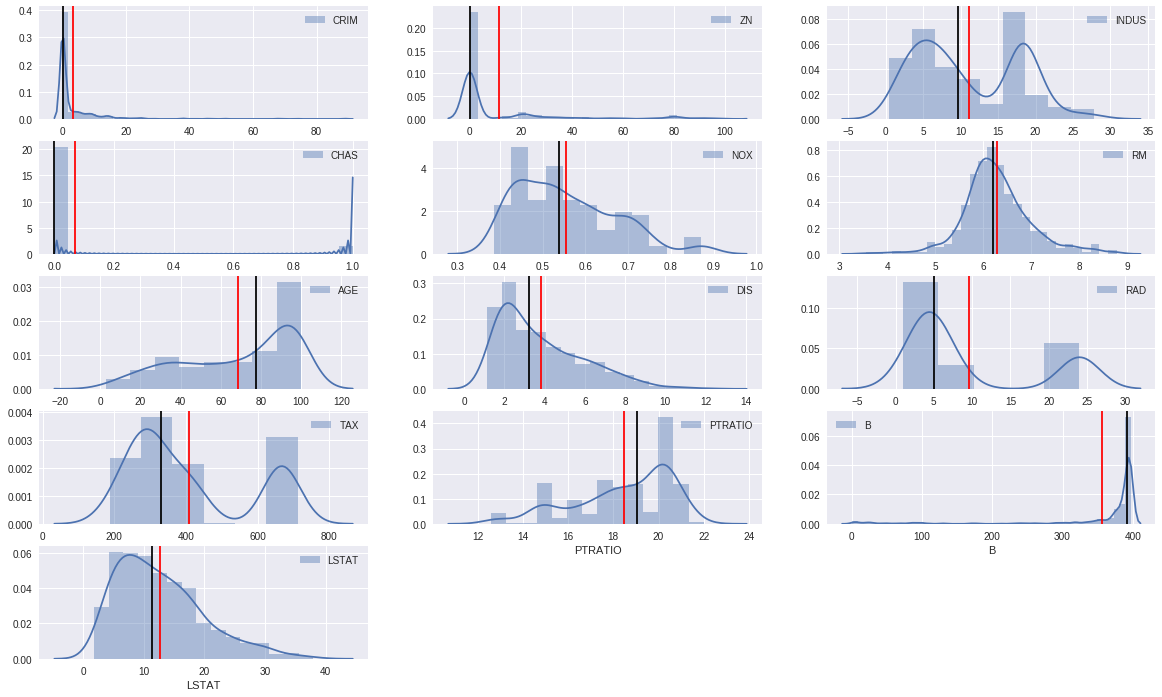

In [9]:
fig = plt.figure(figsize=(20,12))
for i, col in enumerate(boston.feature_names):
    fig.add_subplot(5,3,1+i)
    sns.distplot(X[col], label=col)
    plt.axvline(X[col].mean(), c='red')
    plt.axvline(X[col].median(), c='black')
    plt.legend()

## Standardized Model

In [10]:
results = pd.DataFrame()

In [11]:
X_bc = X+1E-9
model = make_pipeline(BoxCoxTransformer(), StandardScaler(), LinearRegression())
results, _, _ = lm.simple_alpha_grid_search(model, X_bc, y, results, n=1000)

100%|██████████| 1000/1000 [00:47<00:00, 20.96it/s]


In [12]:
model = make_pipeline(BoxCoxTransformer(), StandardScaler(), Lasso())
results, _, _ = lm.simple_alpha_grid_search(model, X_bc, y, results, n=1000)

100%|██████████| 1000/1000 [00:32<00:00, 30.53it/s]


In [13]:
model = make_pipeline(BoxCoxTransformer(), StandardScaler(), Ridge())
results, _, _ = lm.simple_alpha_grid_search(model, X_bc, y, results, n=1000)

100%|██████████| 1000/1000 [00:31<00:00, 32.17it/s]


In [14]:
results

,alpha,data_preprocessing,model,model_name,test_score,train_score
0,NaN,"[boxcoxtransformer, standardscaler]","Pipeline(steps=[('boxcoxtransformer', BoxCoxTr...",linearregression,0.751304,0.778260
0,0.001,"[boxcoxtransformer, standardscaler]","Pipeline(steps=[('boxcoxtransformer', BoxCoxTr...",lasso,0.751307,0.778260
0,1.000,"[boxcoxtransformer, standardscaler]","Pipeline(steps=[('boxcoxtransformer', BoxCoxTr...",ridge,0.751436,0.778242
